In [1]:
from cognitiveatlas.api import get_concept
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
#extract a list of all Cognitive Atlas concepts
allC=get_concept()
allCids=allC.pandas.id
listCids=list(allCids)

http://cognitiveatlas.org/api/v-alpha/concept?
Result Includes:<pandas:data frame><json:dict><txt:str><url:str>


In [3]:
#loop through the terms and extract information about what they are linked to
graph=nx.Graph() #create a graph network object
newDict={}
emptyTerms={}
linkedTerms={}
c=0
d=0
for term in listCids:
    conceptInfo=get_concept(id=term)
    graph.add_node(term) #add node (concept) to the network
    try:
        newDict[term]=conceptInfo.pandas.relationships[0]
        linkedTerms[d]=term
        d=d+1
        try:
            for ind in range(len(conceptInfo.pandas.relationships[0])):
                relatedNode=newDict[term][ind-1]['id']
                graph.add_edge(term,relatedNode) #add edge (link) to the network

        except:
            print('no related nodes')
    except:
        newDict[term]='NaN'
        emptyTerms[c]=term
        c=c+1

http://cognitiveatlas.org/api/v-alpha/concept?id=trm_4a3fd79d096be
Result Includes:<pandas:data frame><json:dict><txt:str><url:str>
http://cognitiveatlas.org/api/v-alpha/concept?id=trm_4a3fd79d096e3
Result Includes:<pandas:data frame><json:dict><txt:str><url:str>
http://cognitiveatlas.org/api/v-alpha/concept?id=trm_4a3fd79d096f0
Result Includes:<pandas:data frame><json:dict><txt:str><url:str>
http://cognitiveatlas.org/api/v-alpha/concept?id=trm_4a3fd79d096fc
Result Includes:<pandas:data frame><json:dict><txt:str><url:str>
http://cognitiveatlas.org/api/v-alpha/concept?id=trm_4a3fd79d09707
Result Includes:<pandas:data frame><json:dict><txt:str><url:str>
http://cognitiveatlas.org/api/v-alpha/concept?id=trm_4a3fd79d09713
Result Includes:<pandas:data frame><json:dict><txt:str><url:str>
http://cognitiveatlas.org/api/v-alpha/concept?id=trm_4a3fd79d0971e
Result Includes:<pandas:data frame><json:dict><txt:str><url:str>
http://cognitiveatlas.org/api/v-alpha/concept?id=trm_4a3fd79d09735
Result In

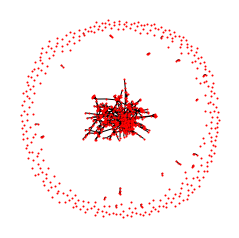

In [5]:
%matplotlib inline
plt.gca().set_aspect('equal', adjustable='box')
plt.gca().set_frame_on(False)
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
nx.draw_networkx(graph,pos=nx.spring_layout(graph),with_labels=False,node_size=1)
plt.savefig('GRAPH.pdf')